### Recommendation systems:Collaborative Filtering
#### Edgar Acuna
#### Mayo 2020
#### Database Movielens(100k) Contains the ratings given by 943 users to 1682 movies
#### Duration: Approx 20 minutes

In [117]:
import warnings
warnings.filterwarnings("ignore")
from surprise import Reader, Dataset
import pandas as pd

In [118]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# pass in column names for each CSV as the column name is not given in the file and read them using pandas.
# You can check the column names from the readme file

#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
url='http://files.grouplens.org/datasets/movielens/ml-100k/u.user'
users = pd.read_csv(url, sep='|', names=u_cols, encoding="ISO-8859-1")


In [119]:
print(users.shape)

(943, 5)


In [120]:
#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
url='http://files.grouplens.org/datasets/movielens/ml-100k/u.data'
ratings = pd.read_csv(url, sep='\t', names=r_cols,encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [121]:
#Showing the ratings given by users to the movies 
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
#Reading items file where the category of the movie is included
i_cols = ['movie_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
url='http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
items = pd.read_csv(url, sep='|', names=i_cols,
encoding='latin-1')

In [123]:
items.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 1-Item-based Recommendation system 

In [124]:
data1 = pd.merge(ratings, items.drop_duplicates(['movie_id']), on='movie_id') 
data1.head() 

,user_id,movie_id,rating,unix_timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#Calculating the mean rating of all the movies
data1.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(10) 

movie title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [126]:
# Calculate count rating of all movies 
data1.groupby('movie title')['rating'].count().sort_values(ascending=False).head(10) 

movie title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [127]:
# Sorting values according to  the 'num of rating column' 
ratings1 = pd.DataFrame(data1.groupby('movie title')['rating'].mean())  
  
ratings1['num of ratings'] = pd.DataFrame(data1.groupby('movie title')['rating'].count()) 
  
ratings.head() 
moviemat = data1.pivot_table(index ='user_id', columns ='movie title', values ='rating') 
  
moviemat.head() 
  
ratings1.sort_values('num of ratings', ascending = False).head(10) 

,rating,num of ratings
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [128]:
# Analyzing correlation with similar movies 
toysstory_user_ratings = moviemat['Toy Story (1995)'] 
# analysing correlation with similar movies 
similar_to_toystory = moviemat.corrwith(toysstory_user_ratings) 
corr_toystory = pd.DataFrame(similar_to_toystory, columns =['Correlation']) 
corr_toystory.dropna(inplace = True) 
  
corr_toystory.head() 
# Similar movies like toy story 
corr_toystory.sort_values('Correlation', ascending = False).head(10) 
corr_toystory = corr_toystory.join(ratings1['num of ratings']) 
  
corr_toystory.head() 
  
corr_toystory[corr_toystory['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
movie title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


### 2.  RS by Collaborative Filtering

In [129]:
#reading the train and the test datasets for ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
url='http://files.grouplens.org/datasets/movielens/ml-100k/ua.base'
ratings_train = pd.read_csv(url, sep='\t', names=r_cols, encoding='latin-1')
url='http://files.grouplens.org/datasets/movielens/ml-100k/ua.test'
ratings_test = pd.read_csv(url, sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [130]:
#Building the user-item matrix
n_users=943
n_items=1682
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]
data_matrix.shape

(943, 1682)

In [131]:
print(data_matrix)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [132]:
#Computing the sparsity of the matrix (percentage of non-zero entries )
sparsity = float(len(data_matrix.nonzero()[0]))
sparsity /= (data_matrix.shape[0] * data_matrix.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.30%


In this dataset, every user has rated at least 20 movies which results in a reasonable sparsity of 6.3%. This means that 6.3% of the user-item ratings have a value. Note that, although we filled in missing ratings as 0, we should not assume these values to truly be zero. More appropriately, they are just empty entries. We will split our data into training and test sets by removing 10 ratings per user from the training set and placing them in the test set.

In [133]:
#Building the training and test sets
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=10, 
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [134]:
train, test = train_test_split(data_matrix)

In [135]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling division-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [136]:
#computing the similarity matrices using the cosine metric
#from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = similarity(train, kind='user')
item_similarity = similarity(train, kind='item')

In [137]:
print(item_similarity[:4, :4])

[[1.         0.40034501 0.32552399 0.47298576]
 [0.40034501 1.         0.28046238 0.50624377]
 [0.32552399 0.28046238 1.         0.34649289]
 [0.47298576 0.50624377 0.34649289 1.        ]]


In [138]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [139]:
user_prediction = predict(train, user_similarity, type='user')
item_prediction = predict(train, item_similarity, type='item')

In [140]:
item_prediction.shape

(943, 1682)

In [141]:
print(user_prediction[:4, :10])

[[ 2.49509483  1.03511453  0.69710907  1.53617055  0.70792004  0.39002586
   2.28198896  1.61643451  1.68297839  0.75751683]
 [ 1.63331372  0.26619656  0.22385302  0.58608639  0.15921003  0.03116709
   1.38847336  0.68894029  1.14865777  0.32551316]
 [ 1.20235838  0.22356796  0.13885771  0.45946891  0.1353421  -0.03591527
   1.0970863   0.52467662  0.81939907  0.17947668]
 [ 1.39973622  0.23902393  0.12056574  0.48508065  0.11535827 -0.09015459
   1.20706596  0.54363655  0.80765957  0.09776823]]


In [142]:
#Computing the MSE of predictions
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [143]:
print('User-based CF MSE: ' + str(get_mse(user_prediction, test)))
print('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))

User-based CF MSE: 8.621529160223917
Item-based CF MSE: 11.45464019525739


### 3. Top-k collaborative filtering

In [144]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [145]:
pred = predict_topk(train, user_similarity, kind='user', k=40)
print('Top-k User-based CF MSE: ' + str(get_mse(user_prediction,test)))

pred = predict_topk(data_matrix, item_similarity, kind='item', k=40)
print('Top-k Item-based CF MSE: ' + str(get_mse(item_prediction, test)))

Top-k User-based CF MSE: 8.621529160223917
Top-k Item-based CF MSE: 11.45464019525739


In [146]:
k_array = [5, 15, 30, 50, 100, 150]
user_train_mse = []
user_test_mse = []
item_test_mse = []
item_train_mse = []

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

for k in k_array:
    user_pred = predict_topk(train, user_similarity, kind='user', k=k)
    item_pred = predict_topk(train, item_similarity, kind='item', k=k)
    
    user_train_mse += [get_mse(user_pred, train)]
    user_test_mse += [get_mse(user_pred, test)]
    
    item_train_mse += [get_mse(item_pred, train)]
    item_test_mse += [get_mse(item_pred, test)]

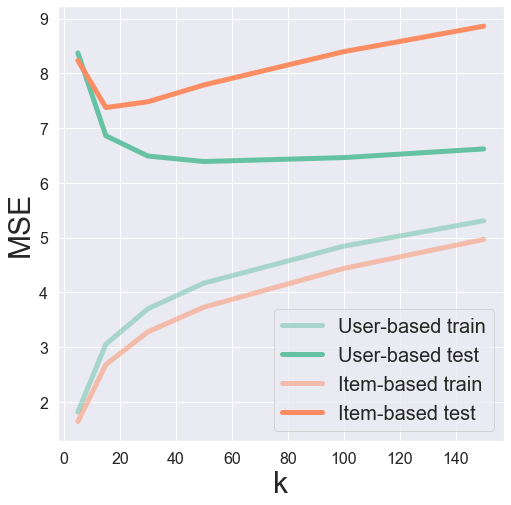

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_mse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_mse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MSE', fontsize=30);

It looks like a k of 50 and 15 produces a  minimum in the test error for user- and item-based collaborative filtering, respectively.

### 3.1  Validation

In [148]:
# Load in movie data
url='http://files.grouplens.org/datasets/movielens/ml-100k/u.item'
idmovies = pd.read_csv(url,header= None,sep='|', encoding="ISO-8859-1")#with open('c://users/edgar2017/ml-100k/u.item', 'r') as f:

In [149]:
idx_to_movie=idmovies.loc[:,4]
idx_to_movie

0       http://us.imdb.com/M/title-exact?Toy%20Story%2...
1       http://us.imdb.com/M/title-exact?GoldenEye%20(...
2       http://us.imdb.com/M/title-exact?Four%20Rooms%...
3       http://us.imdb.com/M/title-exact?Get%20Shorty%...
4       http://us.imdb.com/M/title-exact?Copycat%20(1995)
5       http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6       http://us.imdb.com/M/title-exact?Twelve%20Monk...
7          http://us.imdb.com/M/title-exact?Babe%20(1995)
8       http://us.imdb.com/M/title-exact?Dead%20Man%20...
9       http://us.imdb.com/M/title-exact?Richard%20III...
10        http://us.imdb.com/M/title-exact?Se7en%20(1995)
11      http://us.imdb.com/M/title-exact?Usual%20Suspe...
12      http://us.imdb.com/M/title-exact?Mighty%20Aphr...
13      http://us.imdb.com/M/title-exact?Postino,%20Il...
14      http://us.imdb.com/M/title-exact?Mr.%20Holland...
15      http://us.imdb.com/M/title-exact?Gazon%20maudi...
16      http://us.imdb.com/M/title-exact?From%20Dusk%2...
17      http:/

In [150]:
def top_k_movies(similarity, mapper, movie_idx, k=6):
    return [mapper[x] for x in np.argsort(similarity[movie_idx,:])[:-k-1:-1]]

In [151]:
idx = 0 # Toy Story
movies = top_k_movies(item_similarity, idx_to_movie, idx)

In [152]:
movies

['http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)',
 'http://us.imdb.com/M/title-exact?Star%20Wars%20(1977)',
 'http://us.imdb.com/M/title-exact?Return%20of%20the%20Jedi%20(1983)',
 'http://us.imdb.com/M/title-exact?Independence%20Day%20(1996)',
 'http://us.imdb.com/M/title-exact?Raiders%20of%20the%20Lost%20Ark%20(1981)',
 'http://us.imdb.com/M/title-exact?Rock,%20The%20(1996)']

In [153]:
idx = 1 # Golden Eye
movies = top_k_movies(item_similarity, idx_to_movie, idx)
movies

['http://us.imdb.com/M/title-exact?GoldenEye%20(1995)',
 'http://us.imdb.com/M/title-exact?Under%20Siege%20(1992)',
 'http://us.imdb.com/M/title-exact?Top%20Gun%20(1986)',
 'http://us.imdb.com/M/title-exact?True%20Lies%20(1994)',
 'http://us.imdb.com/M/title-exact?Batman%20(1989)',
 'http://us.imdb.com/M/title-exact?Cliffhanger%20(1993)']

### 3.2 Replacing the cosine similarity measure by the Pearson correlation measure

In [154]:
from sklearn.metrics import pairwise_distances
# Convert from distance to similarity
item_correlation = 1 - pairwise_distances(train.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0.

In [155]:
idx = 0 # Toy Story
movies = top_k_movies(item_correlation, idx_to_movie, idx)
movies

['http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)',
 'http://us.imdb.com/M/title-exact?Star%20Wars%20(1977)',
 'http://us.imdb.com/M/title-exact?Independence%20Day%20(1996)',
 'http://us.imdb.com/M/title-exact?Willy%20Wonka%20and%20the%20Chocolate%20Factory%20(1971)',
 'http://us.imdb.com/M/title-exact?Aladdin%20(1992)',
 'http://us.imdb.com/M/title-exact?Return%20of%20the%20Jedi%20(1983)']

In [156]:
idx = 1 # Golden Eye
movies = top_k_movies(item_correlation, idx_to_movie, idx)
movies

['http://us.imdb.com/M/title-exact?GoldenEye%20(1995)',
 'http://us.imdb.com/M/title-exact?Under%20Siege%20(1992)',
 'http://us.imdb.com/M/title-exact?Top%20Gun%20(1986)',
 'http://us.imdb.com/M/title-exact?Cliffhanger%20(1993)',
 'http://us.imdb.com/M/title-exact?True%20Lies%20(1994)',
 'http://us.imdb.com/M/title-exact?Batman%20(1989)']

### 4. Collaborative Filtering using Matrix Factorization and the module Surprise

In [157]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()


In [158]:
print(data.build_full_trainset())

In [159]:
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9341  0.9317  0.9388  0.9377  0.9400  0.9365  0.0031  
MAE (testset)     0.7365  0.7351  0.7410  0.7402  0.7411  0.7388  0.0025  
Fit time          3.63    3.67    3.58    3.66    3.69    3.64    0.04    
Test time         0.15    0.11    0.11    0.11    0.11    0.12    0.02    


{'test_rmse': array([0.93413582, 0.93167038, 0.93884617, 0.93770827, 0.94001751]),
 'test_mae': array([0.73651372, 0.73508441, 0.74097782, 0.74024075, 0.74111252]),
 'fit_time': (3.6279654502868652,
  3.6665871143341064,
  3.5800633430480957,
  3.658522129058838,
  3.6860525608062744),
 'test_time': (0.14757442474365234,
  0.10934805870056152,
  0.10936260223388672,
  0.1093435287475586,
  0.10934209823608398)}

In [160]:
output=algo.fit(data.build_full_trainset())
predictions = algo.predict(uid='10',iid='0')
score=predictions.est
print(score)

3.8172633659201747


In [161]:
# Train the algorithm on the trainset, and predict ratings for the testset
# sample random trainset and testset
# test set is made of 25% of the ratings.
from surprise import accuracy
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9368


0.9368341791150019

In [162]:
predictions

[Prediction(uid='276', iid='1245', r_ui=3.0, est=3.456317926279125, details={'was_impossible': False}),
 Prediction(uid='416', iid='506', r_ui=5.0, est=4.223451194364308, details={'was_impossible': False}),
 Prediction(uid='442', iid='1183', r_ui=3.0, est=2.4660872550863155, details={'was_impossible': False}),
 Prediction(uid='173', iid='262', r_ui=4.0, est=4.39771291529967, details={'was_impossible': False}),
 Prediction(uid='356', iid='258', r_ui=5.0, est=4.096019774018688, details={'was_impossible': False}),
 Prediction(uid='56', iid='98', r_ui=4.0, est=4.195160794602519, details={'was_impossible': False}),
 Prediction(uid='158', iid='241', r_ui=4.0, est=3.7679094144830882, details={'was_impossible': False}),
 Prediction(uid='650', iid='380', r_ui=2.0, est=3.135612993189252, details={'was_impossible': False}),
 Prediction(uid='197', iid='68', r_ui=2.0, est=3.031461115259064, details={'was_impossible': False}),
 Prediction(uid='653', iid='1135', r_ui=2.0, est=1.8858440445417861, deta

In [163]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)
print(top_n.items)
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

<built-in method items of collections.defaultdict object at 0x0000023B9C193A48>
196 ['169', '603', '98', '12', '316', '313', '408', '483', '114', '480']
186 ['318', '313', '174', '286', '172', '191', '316', '408', '187', '498']
22 ['198', '12', '22', '178', '98', '408', '316', '318', '183', '114']
244 ['134', '285', '127', '654', '483', '408', '14', '514', '513', '178']
166 ['169', '513', '22', '483', '174', '603', '496', '199', '408', '98']
298 ['316', '408', '64', '963', '488', '12', '114', '606', '515', '513']
115 ['285', '603', '134', '408', '223', '14', '483', '709', '514', '646']
253 ['313', '174', '169', '408', '178', '172', '603', '923', '136', '316']
305 ['205', '498', '515', '603', '513', '124', '488', '137', '481', '611']
6 ['603', '654', '648', '657', '615', '923', '641', '251', '1449', '60']
62 ['923', '200', '963', '169', '178', '1019', '496', '185', '515', '272']
286 ['496', '69', '190', '178', '474', '19', '64', '1007', '499', '318']
200 ['178', '316', '64', '272', '181